> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VI: Perceptron

<div style="text-align: right"> **Due date: Nov. 23, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">2019843554 Kai Jun Neo</span> </h2>

In [23]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
This code is written at 2019-11-22 02:23:06.543735


## Problem description

In this problem, we will implemnt an online perceptron algorithm using a MNIST dataset. The MNIST dataset contains handwritten digits that is commonly used for testing various machine learning algorithms. We use a subset of the dataset only. The training data ($\texttt{perceptron_training_data.csv}$) contains two handwritten digits, either 3 or 5, labeled as 1 or -1, respectively. We can visualize each sample using the $\texttt{imshow}$ function after reshaping $794$-dimensional vector to a $28 \times 28$ matrix.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, :1].values.reshape(-1)
    features = df.iloc[:, 1:].columns.values

    return (X, y, features)

In [26]:
X_train, y_train, _ = load_data('perceptron_training_data.csv')
X_test, y_test, _ = load_data('perceptron_test_data.csv')

In [27]:
X_train.shape[1]

784

In [28]:
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [29]:
X_train.shape

(1000, 785)

### P 1.1

(*10 points*) Visualize training samples. Use first 30 samples in training data. You should not include bias term.

In [30]:
from P06 import plot_training_samples

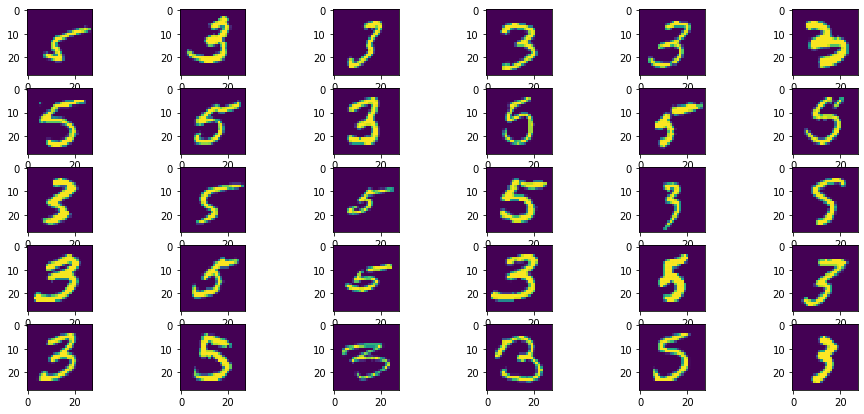

In [31]:
fig = plot_training_samples(X_train, y_train)

### P 1.2

(*50 points*) Implement an online perceptron algorithm.   
  > Initialize weights and the bias to 0.    
  > Number of epoch: 100    
  > An epoch is one complete presentation of the data set to be learned to a learning machine. For example, the total number of iterations is 500 for 5 epochs when the training dataset consists of 100 samples.

In [32]:
from P06 import perceptron

In [33]:
w = np.zeros(X['train'].shape[1])
epoch = 100

In [34]:
w, number_of_misclassifications, test_accuracy = perceptron(X, y, w, epoch)

- predict some labels in test data

In [35]:
def sgn(x):
    return (x >= 0)*2-1

In [36]:
print(sgn(X['test'][6].dot(w)))
print(sgn(X['test'][66].dot(w)))
print(sgn(X['test'][666].dot(w)))
print(sgn(X['test'][4].dot(w)))
print(sgn(X['test'][44].dot(w)))
print(sgn(X['test'][444].dot(w)))

1
-1
1
-1
-1
-1


### P 1.3

(*10 points*) Plot the number of missclassifications over epochs on the training set. Results are not given for this assignment.

In [37]:
from P06 import plot_number_of_misclassifications_over_epochs

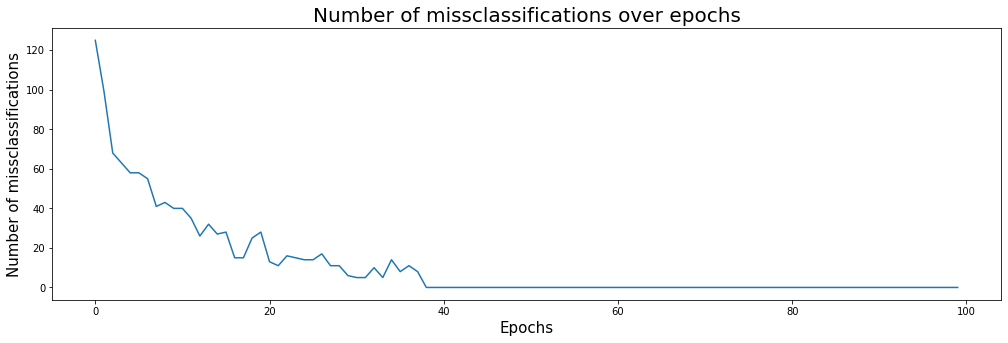

In [38]:
fig = plot_number_of_misclassifications_over_epochs(number_of_misclassifications)

### P 1.4

(*10 points*) Plot the accuracy over epochs on the test set. Results are not given for this assignment.

In [39]:
from P06 import plot_accuracy_over_epochs

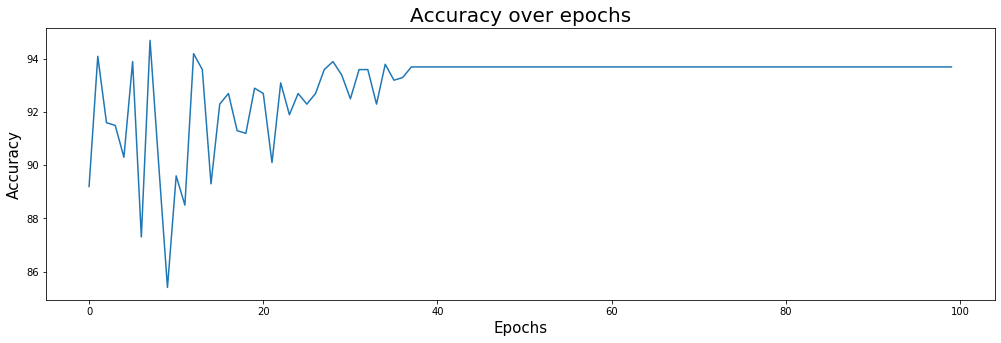

In [40]:
fig = plot_accuracy_over_epochs(test_accuracy)

## Result Analysis and Discussion (20 points)    
For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Online learning
- Perceptron Algorithm

**Online Learning**

Online Learning is a Machine Learning methodology whereby data is fed sequentially on-the-fly over time. When such data arrives at time step t, the machine attempts to predict its output, ${ \hat y }_{ t }$, using the existing model (weights). It then observes the true output, ${ y }_{ t }$, and update the model as deemed neccessary in this particular time step. Online learning can hence be thought of as incremental learning; weights are checked as data arrives. 

**Perceptron Algorithm**

The Perceptron Algorithm is an online, supervised Machine Learning algorithm leveraging on linearity to solve binary classification problems. It is an artifical neuron unit in a Neural Network (Multi-layered Perceptron) with the sign function as its activation function. 

During training, the weights are initialized to zero or intelligently set. At each time step, a data sample is observed to predict its output, ${ \hat y }_{ t }$. 

$${ \hat y }_{ t } = sign(w^{(t)}.{x}_{t}) $$ 

Should the predicted output **not** be equal to the label (true output), the weights,  ${ w }_{ t }$, are updated as follows:

$${ w^{(t+1)} = w^{(t)} + y_{t}x_{t}} $$ 

otherwise, the weights would remain unchanged.

In fact, Perceptron is attempting to minimize the total average hinge loss in batch setting, where **hinge loss for one data sample**, ${ h }_{ i }$, is as follows:
$$
{ h }_{ i } = \left\{
        \begin{array}{ll}
            0 & \; y(w.x) > 0  & (Correct)\\
            -y(w.x)_{+} & \; y(w.x) < 0 & (Wrong)
        \end{array}
    \right.
$$

The total average hinge loss, or equivalently, the loss function, is therefore computed as follows:

$$ Loss \: Function = {\frac{1}{N}{\sum _{ i=1 }^{ N}{ h }_{ i }}} $$

We could obtain the subgradient of hinge loss with respect to weights **for one data point** as follows:

$$\frac{\partial Loss}{\partial w} = I(y_{t}(w.x_{t}) \leq 0)(-yx)$$

Using the above subgradient, the **Batch hinge minimization weight update equation** can be defined as follows:

$$w^{(t+1)} = w^{(t)} + \eta \frac{1}{N} \sum _{i = 1}^{N} \{ I[y_{i}(w^{(t)}.x_{i}) \leq 0]y_{i}x_{i} \}$$

Looking back, we could see that the Perceptron update equation is simply the Stochastic Gradient Descent of Batch hinge minimization with a learning rate ${\eta}$ value of 1.